## **Assignment 1 - Hadoop Map-Reduce**

This document presents the implementation of the first assignment for the Large-Scale Data Management course, focusing on the Hadoop Map-Reduce framework. The assignment is divided into two parts where in the first we develop and execute a MapReduce application using a local Hadoop deployment and in second, we create a custom Map-Reduce application to analyze car sales data.

The following chapters outline the steps taken and the key design decisions made in both parts to achieve the desired outcomes.

### **Part 1**

In this section, after executing the necessary commands to initialize the virtual machine and build the provided Map-Reduce application, we were expected to use a different input file instead of `MobyDick.txt`, which was already used by the application, in order to run again the application and generate the new corresponding output data.

To accomplish this, i followed and executed the following steps:

<b>1. Download a new text file</b>

I downloaded a new text file from `Project Gutenberg` containing the complete works of William Shakespeare and named it `Shakespeare.txt`, as shown in the image below. You can found it by clicking [here](https://www.gutenberg.org/files/100/100-0.txt)

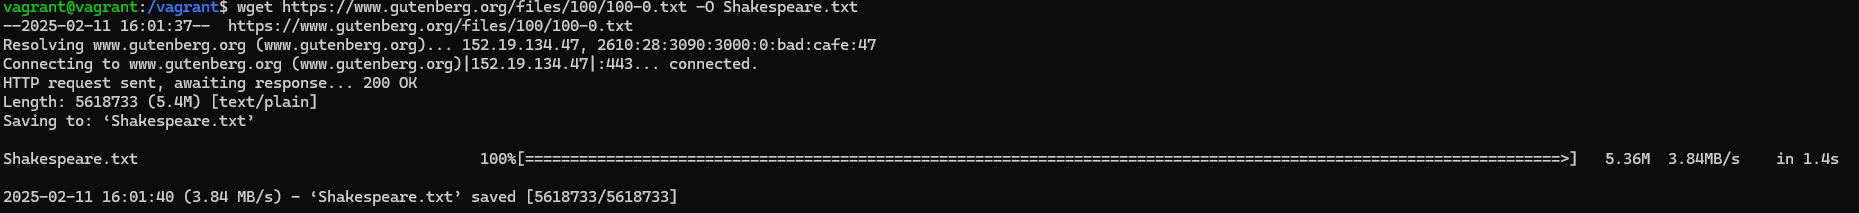

<b>2. Copy the file into the `namenode` Docker container</b>

Moved the new text file into the Docker container named `namenode`, as shown in the image below.

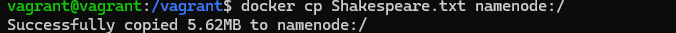

<b>3. Move the file into HDFS</b>

Moved the file inside HDFS under the directory `/user/hdfs/input/` so that it could be used as input for the Map-Reduce application, as shown in the image below.

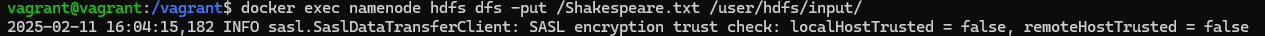

<b>4. Verify the existence of the file in HDFS directory</b>

Verfied that the file was successfully moved in the relevant HDFS directory, as shown in the image below.

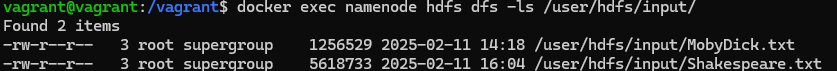

As shown in the image above, in addition to the `MobyDick.txt` file, the `Shakespeare.txt` file is also present.

<b>5. Remove file from the machine and the container</b>

Since the file was stored in HDFS, i removed it from both the machine and the `namenode` Docker container, as shown in the image below.

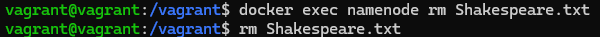

<b>6. Modify `Driver.java` file</b>

As shown in the image below, the initial implementation of the `Drive` class directly sets the input file path of the Map-Reduce application to the `MobyDick.txt` file.

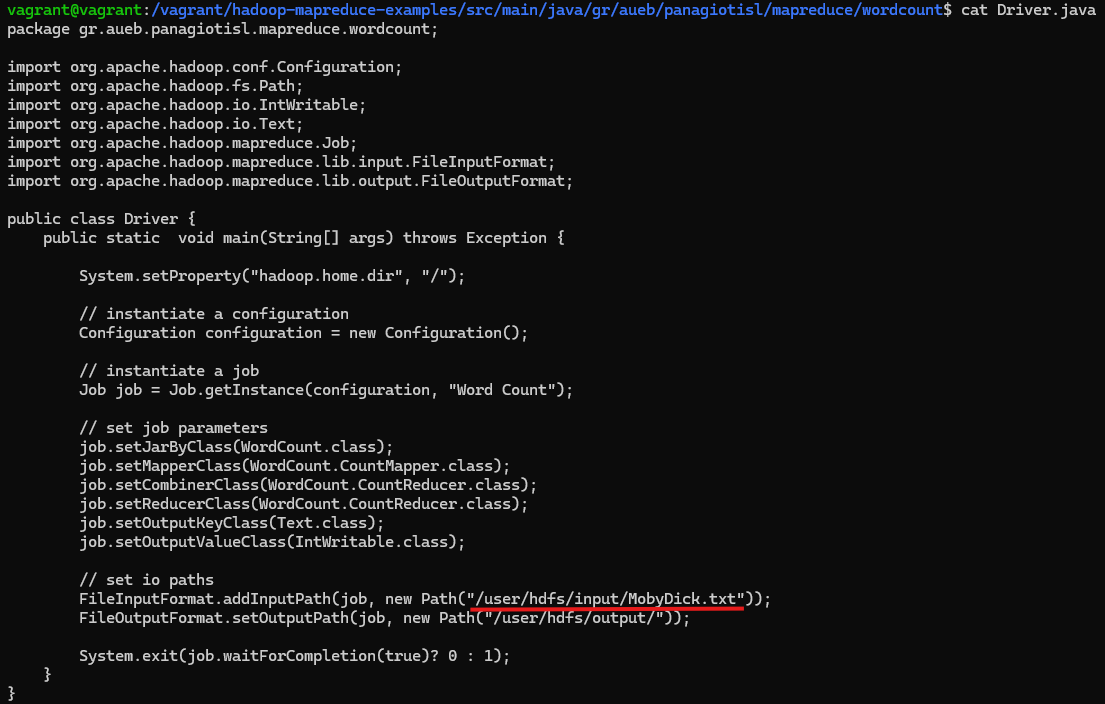

To address this, i modified the input file path to point to `Shakespeare.txt`, as shown in the image below, ensuring it is read during execution.

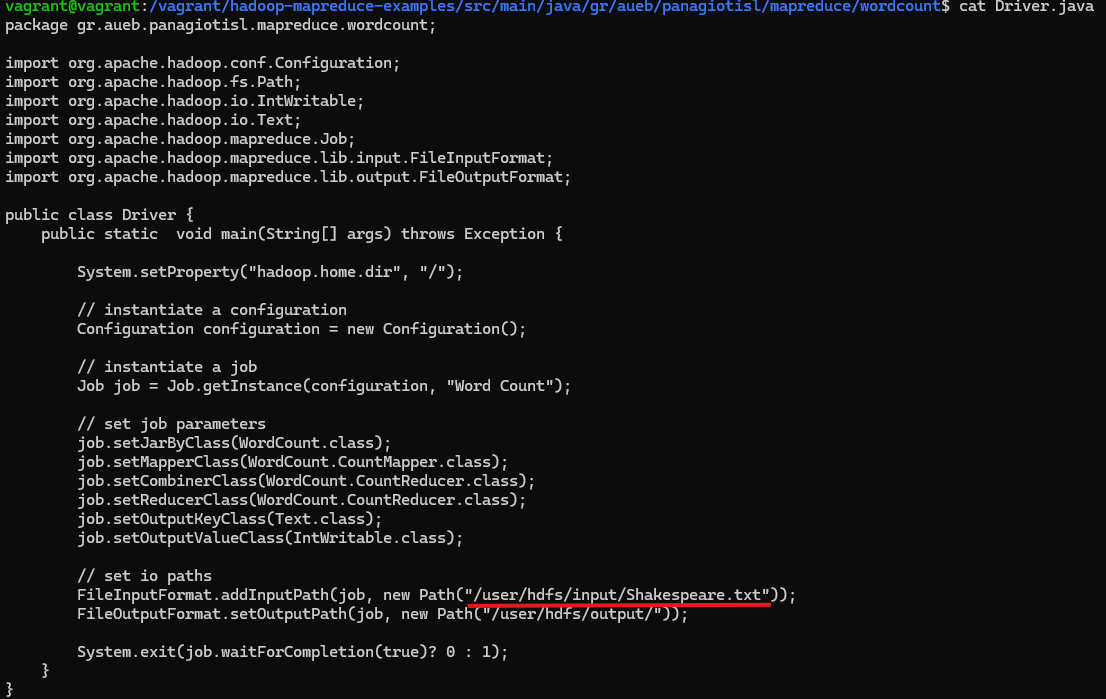

<b>7. Delete any temporary results</b>

I deleted any temporary results from the HDFS, as shown in the image below, since we cannot use the same output location for multiple executions.

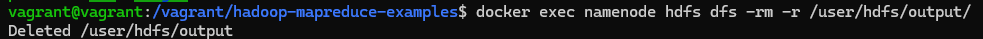

<b>8. Rebuilt the application</b>

After updating the `Driver.java` file, i rebuilt and recompiled the application to incorporate the changes using the command `mvn clean install`.

<b>9. Copy the updated JAR to `namenode` Docker container</b>

Copied the updated JAR file (including the dependencies) to the `namenode` Docker container, as shown in the image below.

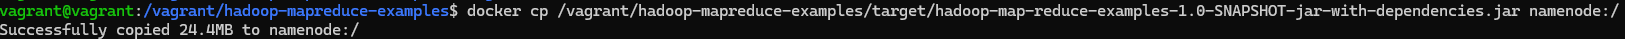

<b>9. Execute the Map-reduce application</b>

Run the updated Map-Reduce application using as input file the `Shakespeare.txt`, as shown in the images below.

<u>Execution - Image 1</u>

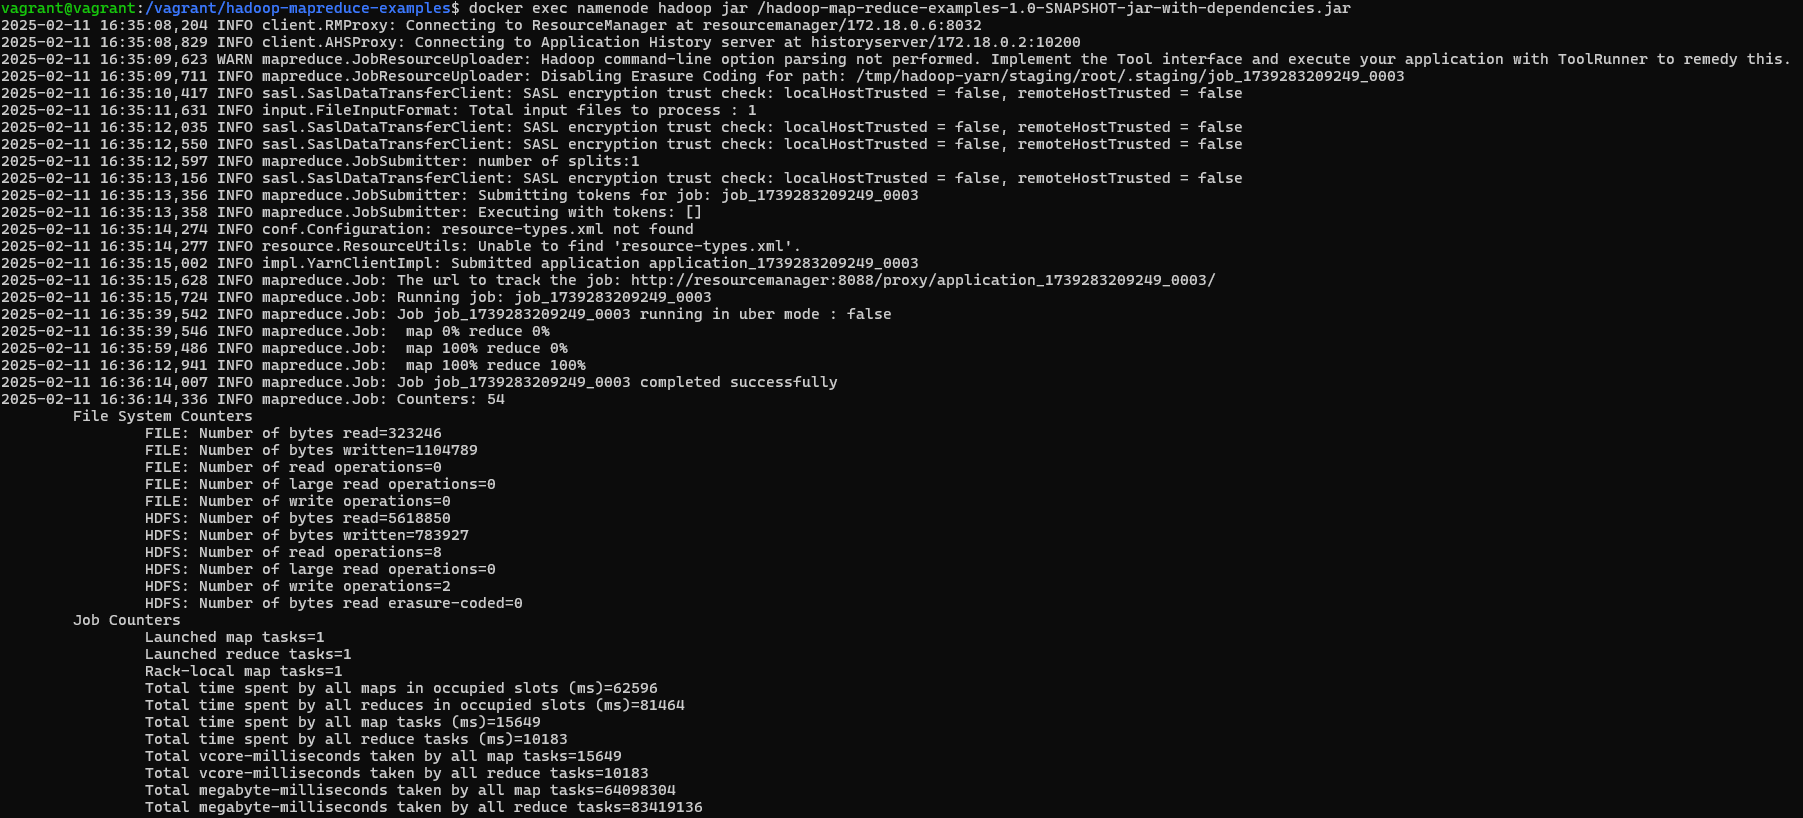

<u>Execution - Image 2</u>

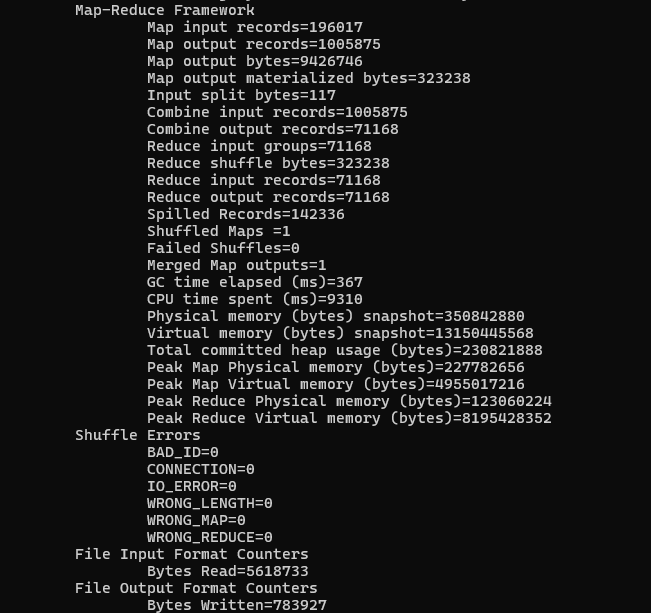

<b>10. Retrieve the results</b>

After executing the application, i retrieved the first 100 lines of the results, as shown in the images below.

<u>Results - Image 1</u>

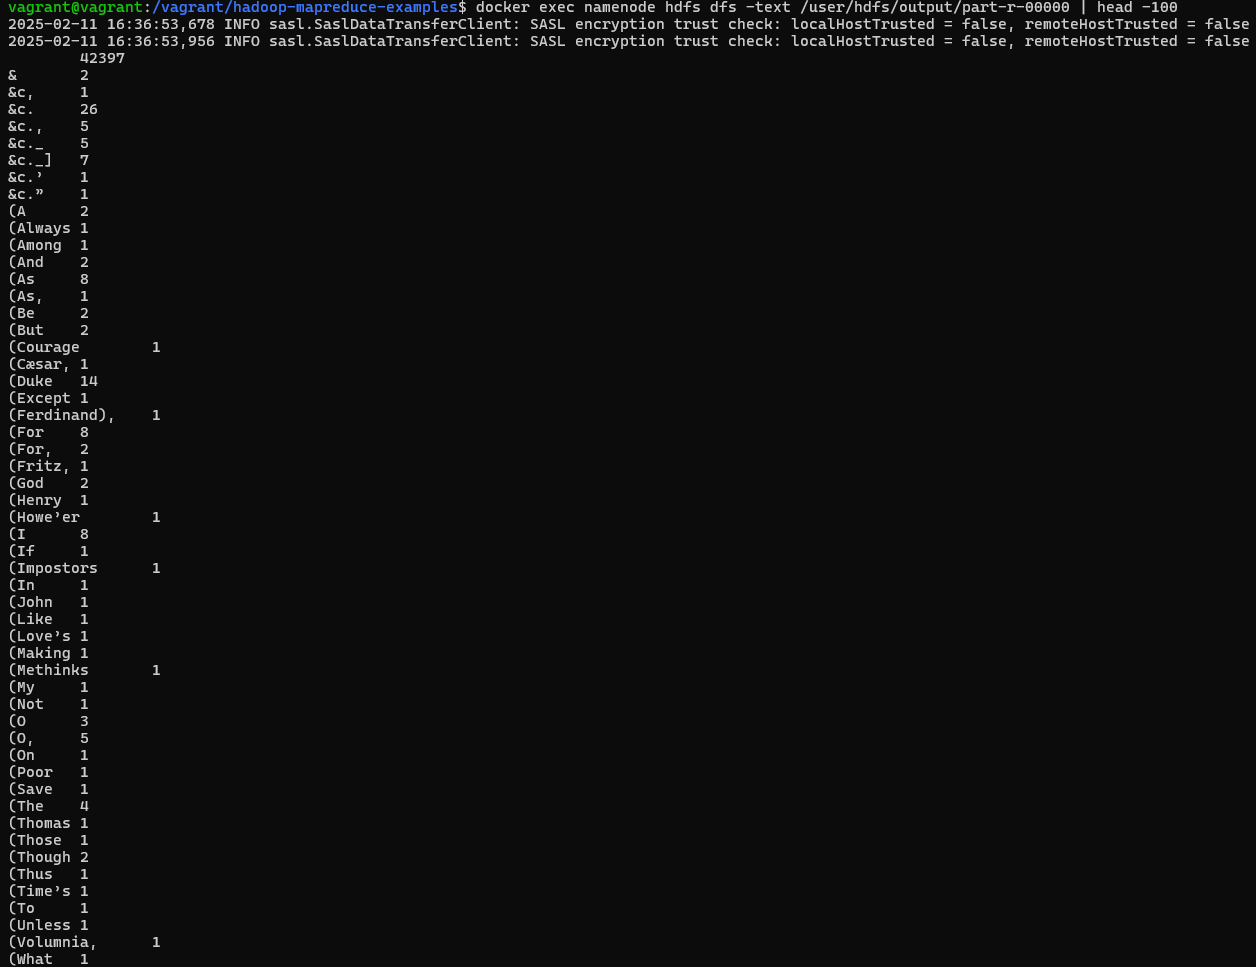

<u>Results - Image 2</u>

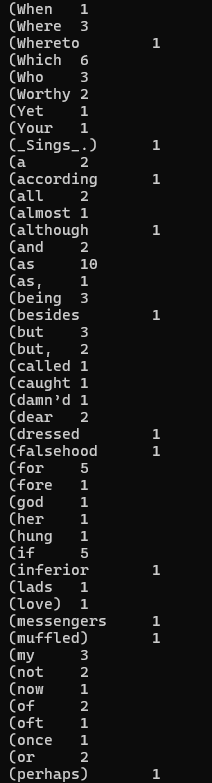


### **Part 2**

In this section, the task was to create a new Map-Reduce application that processes a .csv file containing car sales data. The application needed to generate an output file displaying, for each seller and year-month pair, the car with the highest difference `(sellingprice - mmr)` value along with that difference and the average of that difference of all cars for the same seller and year-month pair.

To accomplish all of this, i followed and executed the following steps:

<b>1. Create a new Maven project</b>

I created a new Maven project named `car-sales-application`, which contains the new developed Map-Reduce application, as shown below.

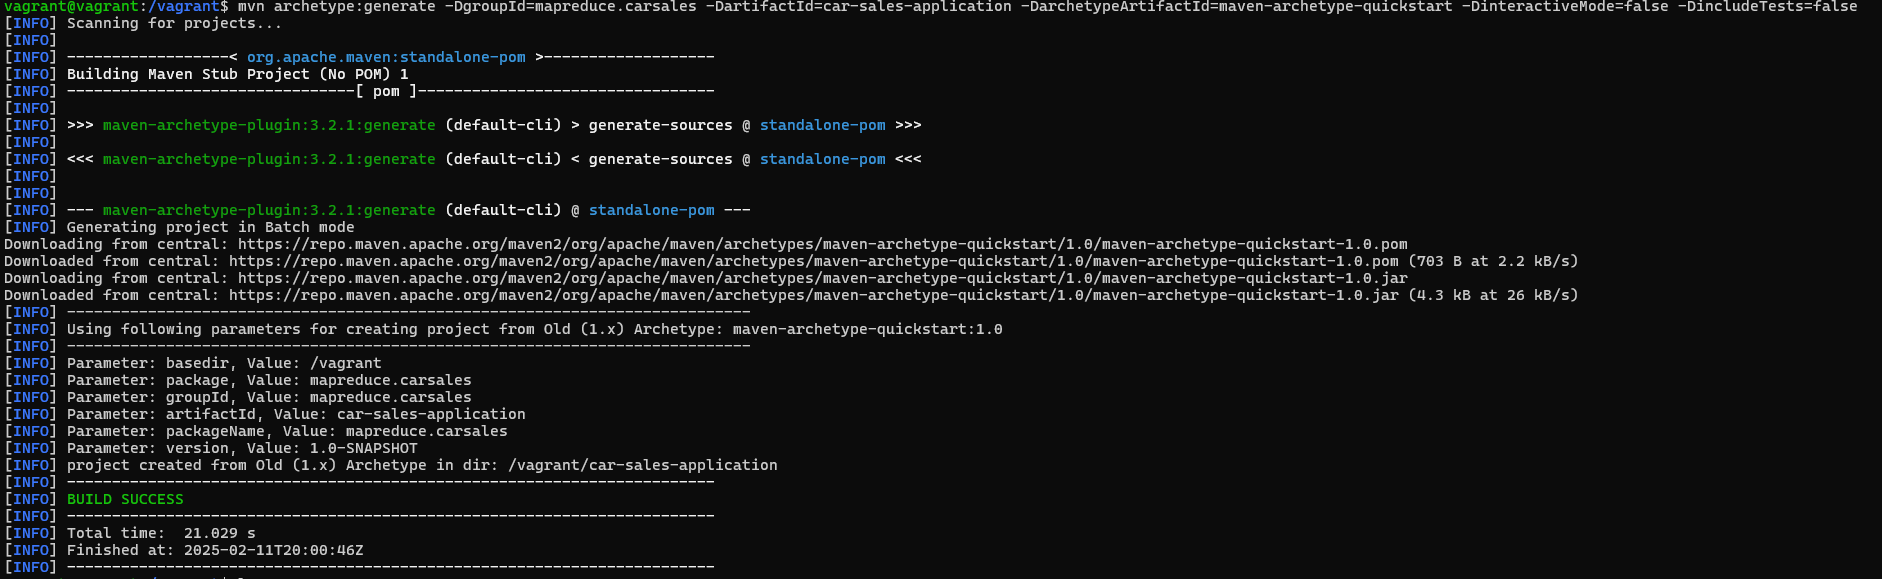

Then, i removed the test directory, as shown below.



<b>2. Updated the pom.xml file</b>

I updated the existing `pom.xml` file by incorporating all the properties, dependencies, and plugins from the `hadoop-mapreduce-examples` application, modifying them as needed to suit my new application. 

<b>3. Create the Driver class</b>

I removed the default `App` class and created a new Java file named `Driver`, as shown below.




The `Driver` class orchestrates the execution of a Map-Reduce application that processes the car sales data. 

It performs the following operations:

- Configures the Hadoop environment.
- Initializes the job with Mapper and Reducer classes.
- Defines input and output formats.
- Executes the Map-Reduce application and waits for completion.

<b>4. Create the Map-Reduce classes</b>

To create these two classes, I added a new Java file named CarSalesAggregate, as shown below.



This file contains the Map and Reduce classes, named `AggregateMapper` and `AggregateReducer`, respectively.

<b><u>AggregateMapper</u></b>

This class is the Mapper in the Hadoop Map-Reduce aaplication. It processes car sales data from a CSV file and extracts relevant information to be further processed in the Reducer.

It performs the following operations:

- Reads each line from the CSV file.
- Checks for missing or invalid values and skips incomplete rows.
- Extracts necessary fields.
    - Make, Model and Trim which represent the car details.
    - Seller.
    - Selling price and mmr.
    - Sale date.
- Computes the price difference as `selling price - mmr`.
- Emits a key-value pair.
    - Key (Text) → "seller:year-month".
    - Value (Text) → "car, price difference".

<b><u>AggregateReducer</u></b>

This class is the Reducer in the Hadoop Map-Reduce application. It aggregates data from the Mapper to:

- Find the car with the largest price difference per (seller:year-month).
- Compute the average price difference for all cars for the same (seller:year-month).

It performs the following operations:

- Receives grouped values from the Mapper as (seller:year-month, list of (car, price difference)).
- Finds the car with the largest price difference for each (seller:year-month) key.
- Computes the average price difference for all cars for each (seller:year-month) key.
- Emits the final key-value pairs.
    - Key (Text) -> "seller:year-month"
    - Value (Text) → "car_with_max_price_difference:max_price_difference, avg: avg_price_difference"

<b>5. Move the file into HDFS</b>

In order to move the car sales CSV file into the HDFS, at first moved it into the Docker container named `namenode` and then inside the HDFS under the directory `/user/hdfs/input/`, as shown below.

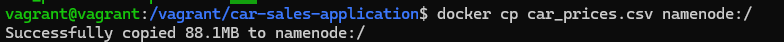
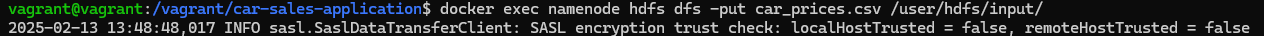

Verified that the file successfully moved into the relevant directory, as shown below.

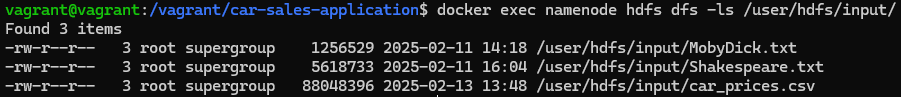

As shown in the image above, in addition to the `MobyDick.txt` and `Shakespeare.txt` files, the `car_prices.csv` file is also present.

Since the file was stored in HDFS, i removed it from both the machine and the `namenode` Docker container, as shown in the image below.





<b>6. Built the application</b>

I built and compiled the application using the command `mvn clean install`

<b>7. Copy the new JAR to `namenode` Docker container</b>

Copied the new JAR file (including the dependencies) to the `namenode` Docker container, as shown in the image below.

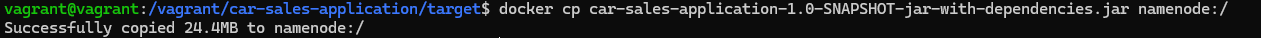

<b>8. Delete any temporary results</b>

I deleted any temporary results from the HDFS, as shown in the image below.

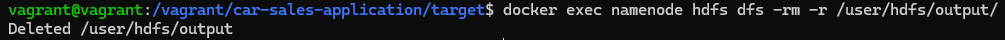

<b>9. Execute the Map-reduce application</b>

Run the new Map-Reduce application using as input file the `car_prices.csv`, as shown in the images below.

<u>Execution - Image 1</u>

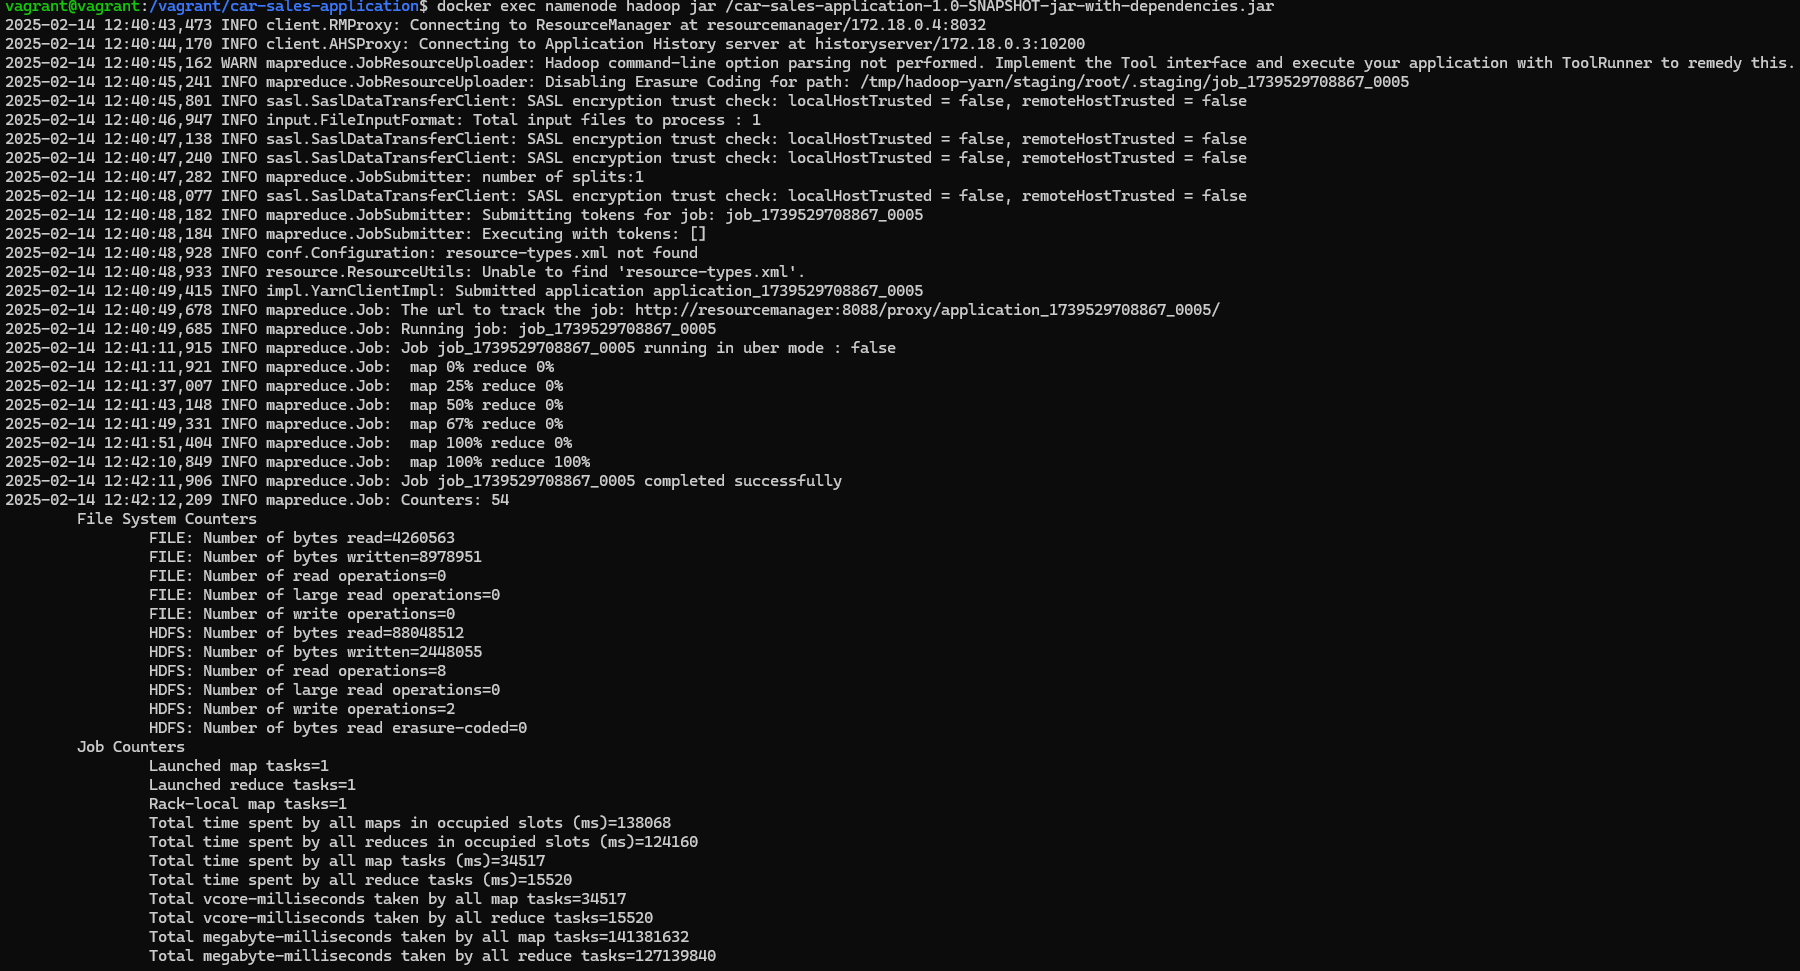

<u>Execution - Image 2</u>

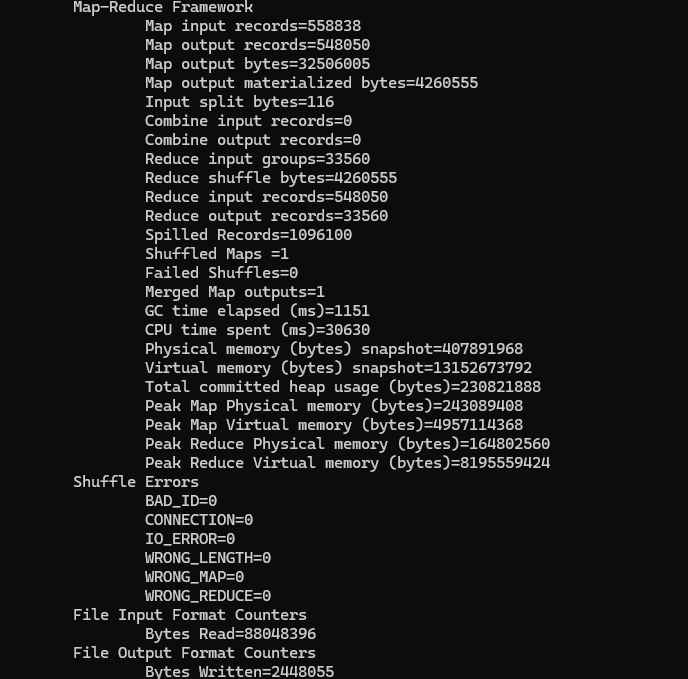

<b>10. Retrieve the results</b>

After executing the application, i retrieved the first 100 lines of the results, as shown in the images below.

<u>Results - Image 1</u>

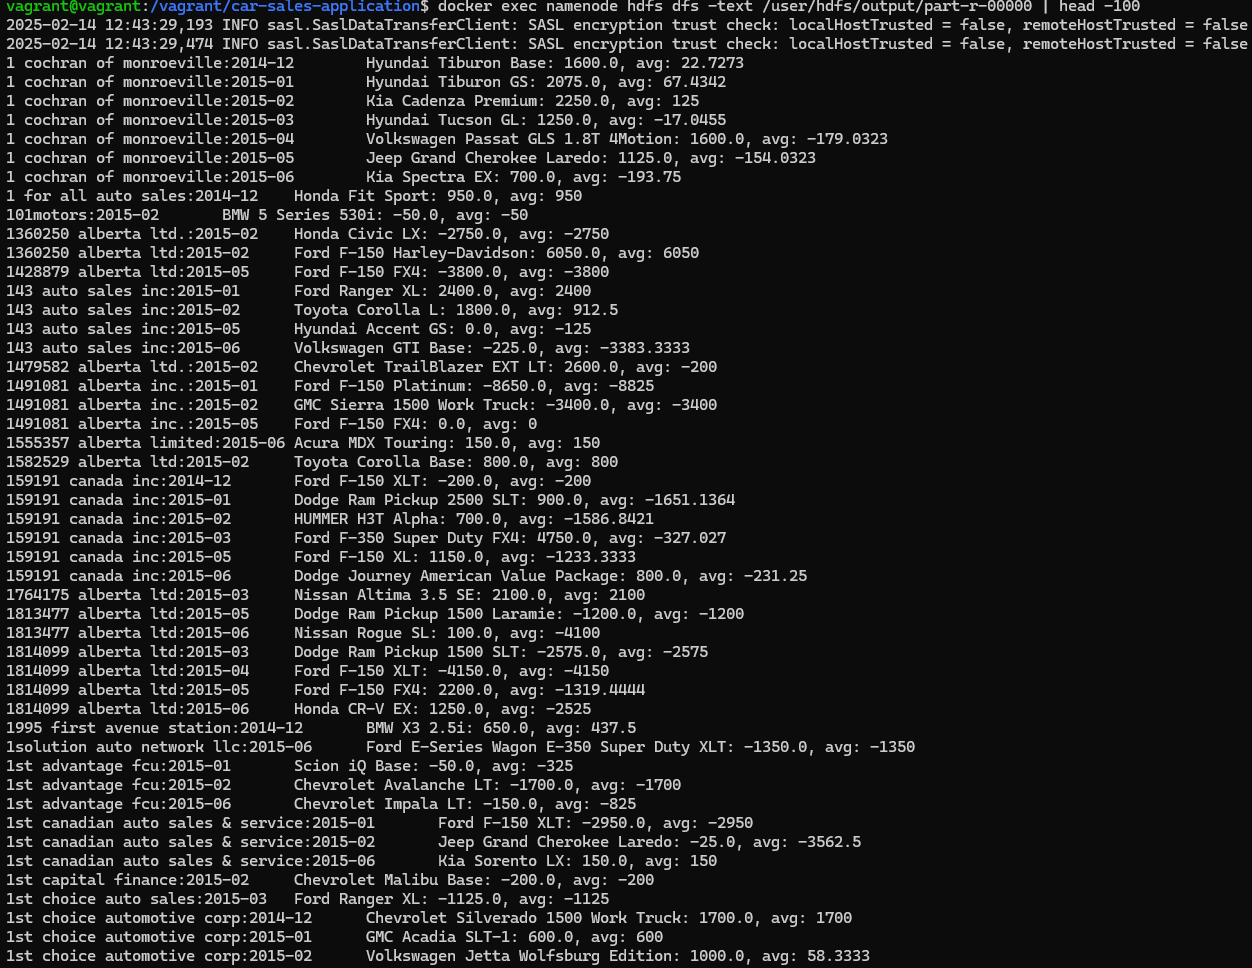

<u>Results - Image 2</u>

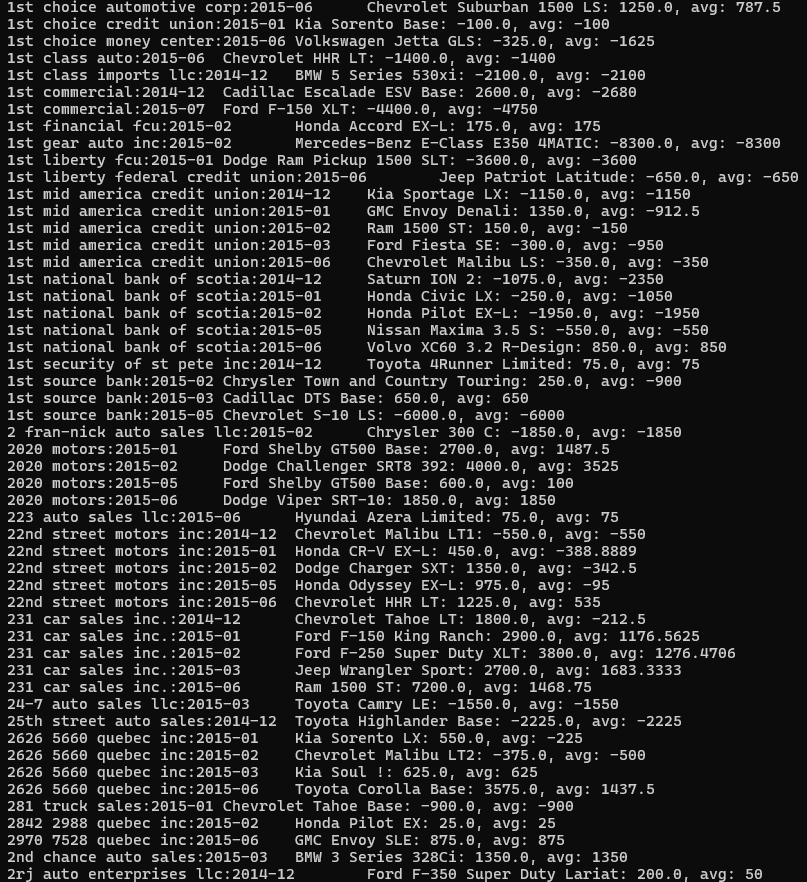